In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#取得Keras Dataset
(x_img_train, y_label_train),(x_img_test, y_label_test) = cifar10.load_data()

170500096/170498071 [==============================] - 94s 1us/step


In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:", 'images:', x_img_train.shape,
      " labels:", y_label_train.shape) 
print("test  data:", 'images:', x_img_test.shape,
      " labels:", y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

#針對Label 做 ONE HOT ENCODE
from keras.utils import to_categorical
y_label_train_OneHot = to_categorical(y_label_train)
y_label_test_OneHot = to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_train_history(train_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(train_history.history['acc'], label='train')
    ax1.plot(train_history.history['val_acc'], label='validation')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    ax2.plot(train_history.history['loss'], label='train')
    ax2.plot(train_history.history['val_loss'], label='validation')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()
    

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

def build_model():
    model = Sequential()
    #卷積層1
    model.add(Conv2D(filters=32, kernel_size=(3,3),
                     input_shape=(32, 32, 3), 
                     activation='relu', 
                     padding='same'))
    model.add(Dropout(rate=0.25))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #卷積層2與池化層2
    model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                     activation='relu', padding='same'))
    model.add(Dropout(0.25))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #建立神經網路(平坦層、隱藏層、輸出層)
    model.add(Flatten())
    model.add(Dropout(rate=0.25))

    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(rate=0.25))

    model.add(Dense(10, activation='softmax'))

    return model

#檢查model 的STACK
model = build_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 247s 6ms/step - loss: 1.8129 - acc: 0.3420 - val_loss: 1.6069 - val_acc: 0.4591
Epoch 2/10
40000/40000 [==============================] - 248s 6ms/step - loss: 1.4523 - acc: 0.4764 - val_loss: 1.3858 - val_acc: 0.5356
Epoch 3/10
40000/40000 [==============================] - 252s 6ms/step - loss: 1.3002 - acc: 0.5374 - val_loss: 1.3147 - val_acc: 0.5753
Epoch 4/10
40000/40000 [==============================] - 251s 6ms/step - loss: 1.1966 - acc: 0.5777 - val_loss: 1.2167 - val_acc: 0.6135
Epoch 5/10
40000/40000 [==============================] - 250s 6ms/step - loss: 1.1107 - acc: 0.6053 - val_loss: 1.1568 - val_acc: 0.6287
Epoch 6/10
40000/40000 [==============================] - 247s 6ms/step - loss: 1.0431 - acc: 0.6315 - val_loss: 1.1198 - val_acc: 0.6307
Epoch 7/10
40000/40000 [==============================] - 248s 6ms/step - 

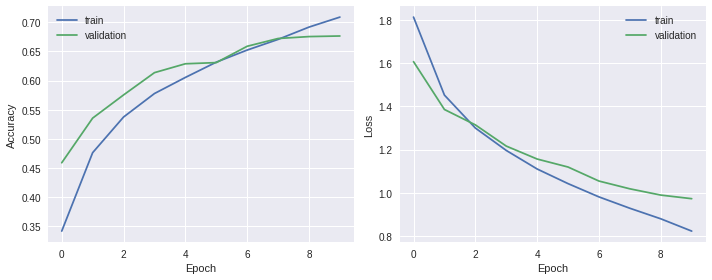

In [7]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)          

show_train_history(history)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 237s 6ms/step - loss: 0.0899 - acc: 0.1228 - val_loss: 0.0894 - val_acc: 0.1912
Epoch 2/10
40000/40000 [==============================] - 233s 6ms/step - loss: 0.0888 - acc: 0.1639 - val_loss: 0.0885 - val_acc: 0.2267
Epoch 3/10
40000/40000 [==============================] - 232s 6ms/step - loss: 0.0871 - acc: 0.2104 - val_loss: 0.0869 - val_acc: 0.2619
Epoch 4/10
40000/40000 [==============================] - 229s 6ms/step - loss: 0.0851 - acc: 0.2462 - val_loss: 0.0850 - val_acc: 0.2895
Epoch 5/10
40000/40000 [==============================] - 229s 6ms/step - loss: 0.0833 - acc: 0.2752 - val_loss: 0.0838 - val_acc: 0.3166
Epoch 6/10
40000/40000 [==============================] - 228s 6ms/step - loss: 0.0821 - acc: 0.2965 - val_loss: 0.0827 - val_acc: 0.3310
Epoch 7/10
40000/40000 [==============================] - 227s 6ms/step - loss: 0.0809 - acc: 0.3143 - val_loss: 0.0816 - 

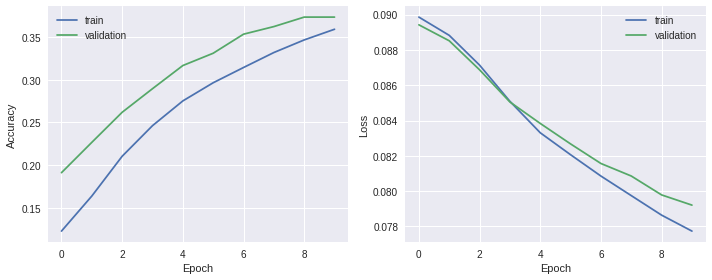

In [11]:
'''
作業:
請分別選用 "MSE", "binary_crossentropy"
查看Train/test accurancy and loss rate
'''

model = build_model()
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)          

show_train_history(history)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 227s 6ms/step - loss: 0.3084 - acc: 0.9001 - val_loss: 0.2948 - val_acc: 0.9000
Epoch 2/10
40000/40000 [==============================] - 225s 6ms/step - loss: 0.2825 - acc: 0.9010 - val_loss: 0.2819 - val_acc: 0.9002
Epoch 3/10
40000/40000 [==============================] - 225s 6ms/step - loss: 0.2680 - acc: 0.9029 - val_loss: 0.2683 - val_acc: 0.9012
Epoch 4/10
40000/40000 [==============================] - 224s 6ms/step - loss: 0.2561 - acc: 0.9050 - val_loss: 0.2587 - val_acc: 0.9018
Epoch 5/10
40000/40000 [==============================] - 225s 6ms/step - loss: 0.2469 - acc: 0.9070 - val_loss: 0.2496 - val_acc: 0.9037
Epoch 6/10
40000/40000 [==============================] - 226s 6ms/step - loss: 0.2399 - acc: 0.9086 - val_loss: 0.2433 - val_acc: 0.9055
Epoch 7/10
40000/40000 [==============================] - 229s 6ms/step - loss: 0.2338 - acc: 0.9101 - val_loss: 0.2379 - 

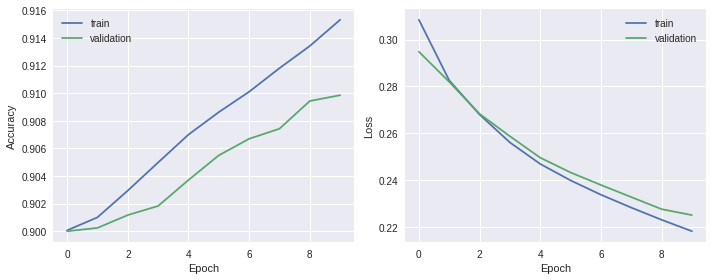

In [12]:
model = build_model()
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)          

show_train_history(history)